### Importing the Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns

### Importing the Datasets

In [54]:
train = pd.read_csv(r"E:\Python All in One\DATA_SETS\Airplane Crash Data\train.csv")
test = pd.read_csv(r"E:\Python All in One\DATA_SETS\Airplane Crash Data\test.csv") 

In [3]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


### Checking the Null Values if available

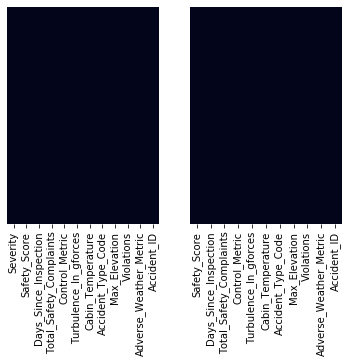

In [9]:
pt.subplot(1, 2, 1)
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)
pt.subplot(1, 2, 2)
sns.heatmap(test.isnull(), yticklabels = False, cbar = False)

### Checking the Coorelations of Variables

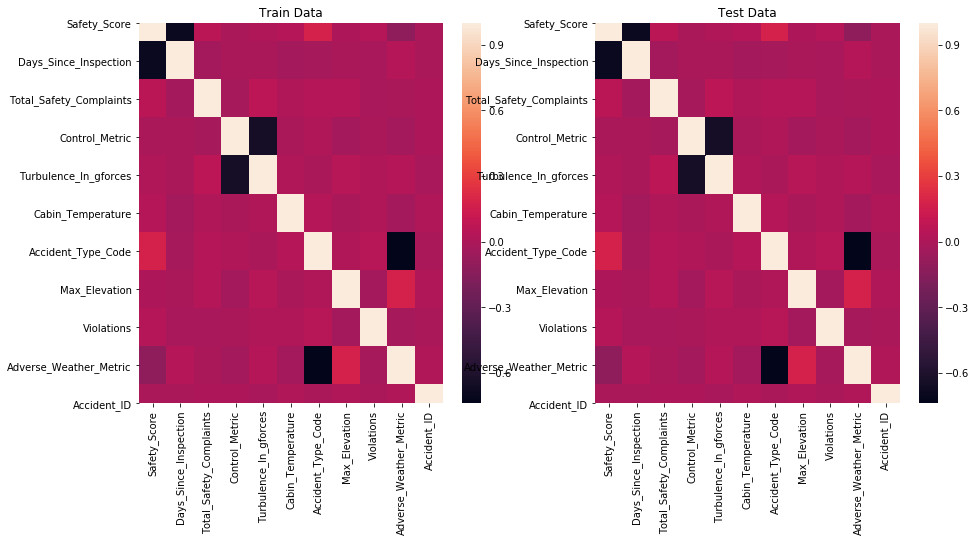

In [13]:
pt.figure(figsize = (15, 7))
pt.subplot(1, 2, 1)
pt.title("Train Data")
sns.heatmap(train.corr())

pt.subplot(1, 2, 2)
pt.title("Test Data")
sns.heatmap(train.corr())

In [15]:
# Checking the unique values in Dependent Variable ("Severity")
train.Severity.unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

In [16]:
# Checking the Unique Values in Accident_Type_Code
train.Accident_Type_Code.unique()

array([2, 7, 3, 4, 1, 6, 5], dtype=int64)

In [22]:
# Checking the Unqiue Values in Violations
train.Violations.unique()

array([3, 2, 1, 0, 4, 5], dtype=int64)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [55]:
#Dropping the Accident Id
train.drop("Accident_ID", inplace = True, axis = 1)

In [56]:
train = pd.get_dummies(train, columns = ['Accident_Type_Code'], drop_first = True)


In [57]:
train

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_Type_Code_2,Accident_Type_Code_3,Accident_Type_Code_4,Accident_Type_Code_5,Accident_Type_Code_6,Accident_Type_Code_7
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,31335.476824,3,0.424352,1,0,0,0,0,0
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,26024.711057,2,0.352350,1,0,0,0,0,0
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,39269.053927,3,0.003364,0,0,0,0,0,1
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,42771.499200,1,0.211728,0,1,0,0,0,0
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,35509.228515,2,0.176883,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Significant_Damage_And_Serious_Injuries,56.118721,8,1,63.445761,0.482359,78.64,38537.363408,2,0.026150,0,0,0,1,0,0
9996,Highly_Fatal_And_Damaging,40.365297,10,7,62.169553,0.421775,79.77,40846.916900,2,0.074898,0,0,1,0,0,0
9997,Significant_Damage_And_Serious_Injuries,27.853881,17,1,69.598906,0.318277,80.37,33771.996300,3,0.168173,0,1,0,0,0,0
9998,Minor_Damage_And_Injuries,56.210046,8,0,39.835916,0.598118,76.92,39820.419251,2,0.026381,0,0,0,1,0,0


In [58]:
# Getting Dependent and Independent variables
x = train.iloc[:, 1:16].values
y = train.iloc[:, 0].values

In [61]:
#Splitting Training and Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [95]:
def get_score(x):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    classifier = RandomForestClassifier(n_estimators = x, random_state = 0)
    classifier.fit(x_train, y_train)
    return(accuracy_score(classifier.predict(x_test), y_test))
    

In [96]:
#Hyper Parameter Tuning
results = {}
for i in range(50, 300, 20):
    results[i] = get_score(i)
    
print(results)

{50: 0.861, 70: 0.857, 90: 0.867, 110: 0.864, 130: 0.87, 150: 0.8725, 170: 0.8705, 190: 0.8695, 210: 0.871, 230: 0.872, 250: 0.8715, 270: 0.8705, 290: 0.867}


## Creating Pipeline

In [98]:
#Defining PipeLines
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
my_pipeline = Pipeline(steps = [('model', RandomForestClassifier(
                                n_estimators = 150, random_state = 0))])

In [99]:
my_pipeline.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('model',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=150, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [100]:
y_pred = my_pipeline.predict(x_test)

In [101]:
accuracy_score(y_pred, y_test)

0.8725

In [102]:
temp = test.Accident_ID

In [103]:
test.drop('Accident_ID', inplace = True, axis = 1)

In [104]:
test = pd.get_dummies(test, columns = ['Accident_Type_Code'], drop_first = True)


In [105]:
test

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_Type_Code_2,Accident_Type_Code_3,Accident_Type_Code_4,Accident_Type_Code_5,Accident_Type_Code_6,Accident_Type_Code_7
0,19.497717,16,6,72.151322,0.388959,78.32,37949.724386,2,0.069692,0,0,1,0,0,0
1,58.173516,15,3,64.585232,0.250841,78.60,30194.805567,2,0.002777,0,0,0,0,0,1
2,33.287671,15,3,64.721969,0.336669,86.96,17572.925484,1,0.004316,0,0,0,0,1,0
3,3.287671,21,5,66.362808,0.421775,80.86,40209.186341,2,0.199990,0,1,0,0,0,0
4,10.867580,18,2,56.107566,0.313228,79.22,35495.525408,2,0.483696,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,68.127854,8,11,49.680948,0.470819,77.80,48251.586622,2,0.659387,1,0,0,0,0,0
2496,54.840183,9,9,71.194166,0.417087,79.77,20761.984416,1,0.005010,0,0,0,0,1,0
2497,36.712329,14,10,91.203282,0.313950,83.96,36676.100601,2,0.008629,0,0,0,0,1,0
2498,38.721461,13,14,73.154057,0.275003,77.38,24211.359510,1,0.006247,0,0,0,0,1,0


In [107]:
check = test.iloc[:, 0:15].values

In [109]:
submission_y = my_pipeline.predict(check)

In [120]:
submission = pd.DataFrame({'Accident_ID':temp, 'Severity':submission_y})

In [122]:
submission.to_csv("Output.csv", index = False)